In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
stock_data = pd.read_csv('/content/TESLA.csv')
#stock_data.head()
print(stock_data)



            Date        Open        High         Low       Close   Adj Close  \
0     19-03-2018   21.100000   21.383333   20.644667   20.903999   20.903999   
1     20-03-2018   20.991333   21.083332   20.584000   20.703333   20.703333   
2     21-03-2018   20.683332   21.496000   20.679333   21.101999   21.101999   
3     22-03-2018   20.926001   21.254667   20.545334   20.606667   20.606667   
4     23-03-2018   20.750000   20.750000   20.030001   20.102667   20.102667   
...          ...         ...         ...         ...         ...         ...   
1254  13-03-2023  167.460007  177.350006  163.910004  174.479996  174.479996   
1255  14-03-2023  177.309998  183.800003  177.139999  183.259995  183.259995   
1256  15-03-2023  180.800003  182.339996  176.029999  180.449997  180.449997   
1257  16-03-2023  180.369995  185.809998  178.839996  184.130005  184.130005   
1258  17-03-2023  184.520004  186.220001  177.330002  180.130005  180.130005   

         Volume  
0     112264500  
1  

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

<ipython-input-4-50482c377383>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [ ]:
y = np.array(stock_data['Close']).reshape(-1, 1)
stock_data = stock_data.dropna()
stock_data.isnull().sum()
stock_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,137.997213,141.229156,134.456284,137.916001,137.916001,1.363866e+08
std,116.193974,118.823912,113.200912,116.019798,116.019798,9.029443e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,21.088333,21.522334,20.659001,21.148001,21.148001,7.722870e+07
50%,126.599335,131.699997,122.747330,125.806000,125.806000,1.059195e+08
75%,235.556671,239.885003,231.284996,236.125000,236.125000,1.677005e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
print(f'Dataframe contains stock prices between {stock_data.Date.min()} {stock_data.Date.max()}')
print(f'Total days = {(stock_data.Date.max()  - stock_data.Date.min()).days} days')

Dataframe contains stock prices between 2018-01-05 00:00:00 2023-12-01 00:00:00
Total days = 2156 days


In [ ]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,137.997213,141.229156,134.456284,137.916001,137.916001,1.363866e+08
std,116.193974,118.823912,113.200912,116.019798,116.019798,9.029443e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,21.088333,21.522334,20.659001,21.148001,21.148001,7.722870e+07
50%,126.599335,131.699997,122.747330,125.806000,125.806000,1.059195e+08
75%,235.556671,239.885003,231.284996,236.125000,236.125000,1.677005e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
stock_data.shape

(1259, 7)

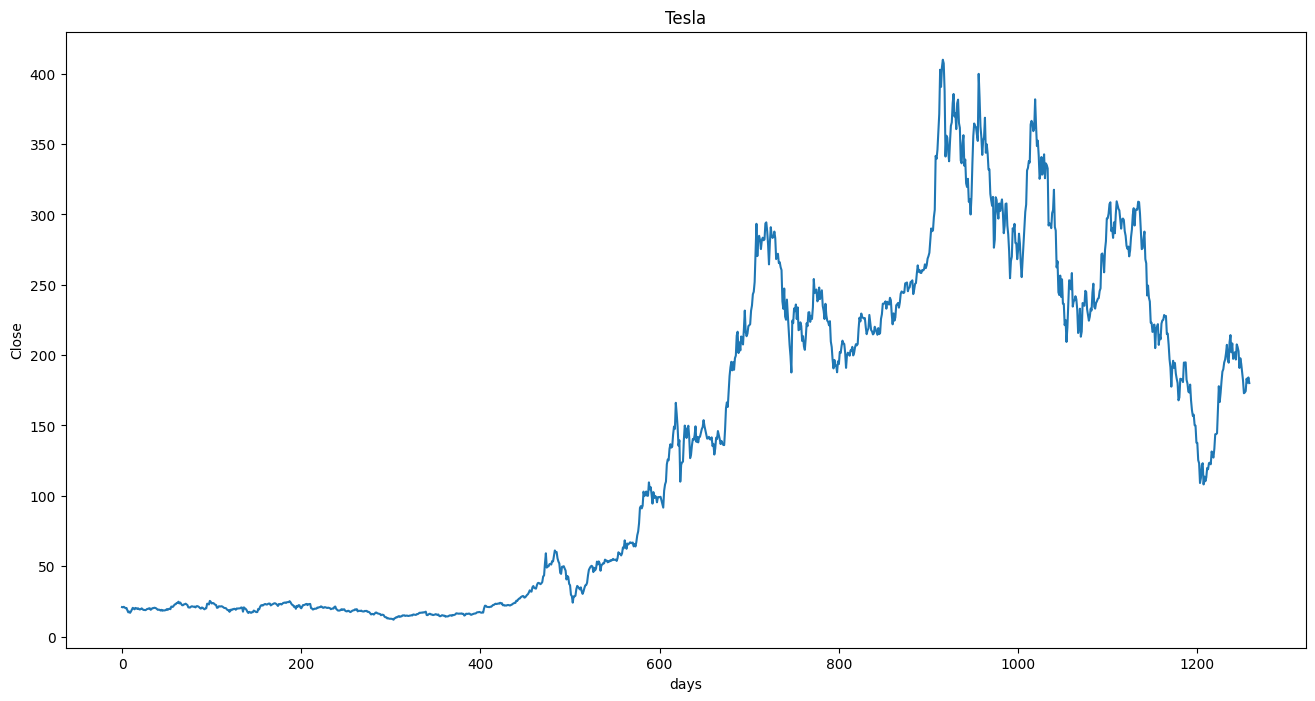

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('days')
plt.ylabel('Close')
plt.plot(stock_data['Close'])
plt.show()

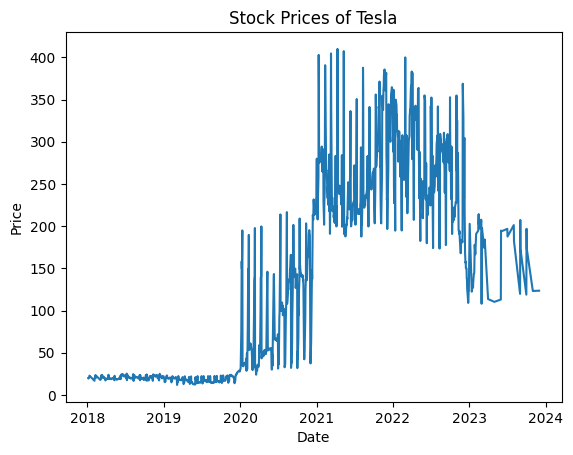

In [ ]:
sns.lineplot(data=stock_data, x='Date', y='Close')
plt.title('Stock Prices of Tesla')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
#Split the data into train and test sets
X = np.array(stock_data.index).reshape(-1,1)
Y = stock_data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [ ]:
#feature scaling
scaler = StandardScaler().fit(X_train)

In [ ]:
#creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

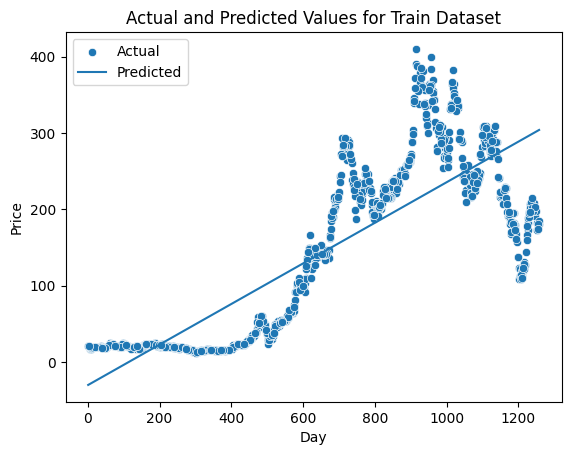

In [ ]:
sns.scatterplot(x=X_train.T[0], y=Y_train, label='Actual')
sns.lineplot(x=X_train.T[0], y=lm.predict(X_train).T, label='Predicted')
plt.title('Actual and Predicted Values for Train Dataset')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
comparison=pd.DataFrame(list(zip(Y_test,y_pred)), columns=['Actual','Predicted'])

In [ ]:
comparison

,Actual,Predicted
0,22.737333,12.777378
1,365.000000,217.826574
2,20.110666,0.559421
3,18.963333,-21.751632
4,95.384003,128.316756
...,...,...
247,21.996000,83.694652
248,20.381332,-27.063787
249,341.166656,213.842457
250,288.170013,262.979894


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Printout relevant metrics
print("Model Coefficients:", lm.coef_)
print("Mean Absolute Error:", mean_absolute_error(Y_test, y_pred))
print("Coefficient of Determination:", r2_score(Y_test, y_pred))


Model Coefficients: [0.26560777]
Mean Absolute Error: 52.334026518556534
Coefficient of Determination: 0.6883907885088063


In [ ]:
# Random Forest Algoritm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

print('MSE:', mse)

# Calculate the accuracy percentage
accuracy = (1 - (mse / np.mean(y_test))) * 100
print('Accuracy of Random Forest:', accuracy, '%')

<ipython-input-22-99d8c84015c8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Mean squared error: 39.083401163292116
MSE: 39.083401163292116
Accuracy of Random Forest: 70.96377294059775 %


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


# Extract the 'Close' column
data = stock_data.filter(['Close'])
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Define the training data
training_data_len = int(np.ceil(len(dataset) * 0.8))
training_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])

# Convert the x_train and y_train datasets to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

# Create the testing dataset
test_data = scaled_data[training_data_len-60:, :]

# Split the testing dataset into x_test and y_test datasets
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the x_test dataset to numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('RMSE:', rmse)


Epoch 1/100
30/30 [==============================] - 10s 98ms/step - loss: 0.0227
Epoch 2/100
30/30 [==============================] - 3s 116ms/step - loss: 0.0038
Epoch 3/100
30/30 [==============================] - 4s 122ms/step - loss: 0.0032
Epoch 4/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0034
Epoch 5/100
30/30 [==============================] - 3s 97ms/step - loss: 0.0037
Epoch 6/100
30/30 [==============================] - 3s 111ms/step - loss: 0.0039
Epoch 7/100
30/30 [==============================] - 4s 128ms/step - loss: 0.0035
Epoch 8/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0027
Epoch 9/100
30/30 [==============================] - 3s 97ms/step - loss: 0.0026
Epoch 10/100
30/30 [==============================] - 3s 110ms/step - loss: 0.0027
Epoch 11/100
30/30 [==============================] - 4s 126ms/step - loss: 0.0029
Epoch 12/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0023
Epoch 13/100
30/30

<ipython-input-45-bc399a2ce523>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


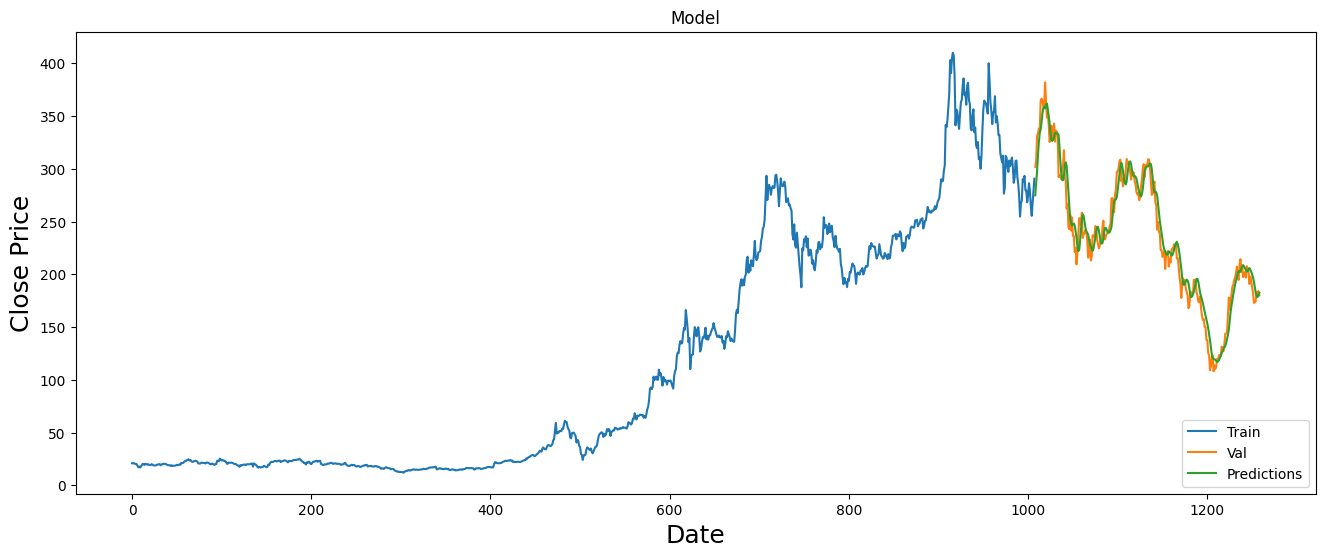

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
1008,301.796661,274.801697
1009,307.053345,286.080902
1010,331.326660,297.924957
1011,333.036682,312.508514
1012,337.973328,325.183411
...,...,...
1254,174.479996,182.677231
1255,183.259995,178.942383
1256,180.449997,178.400467
1257,184.130005,179.761444


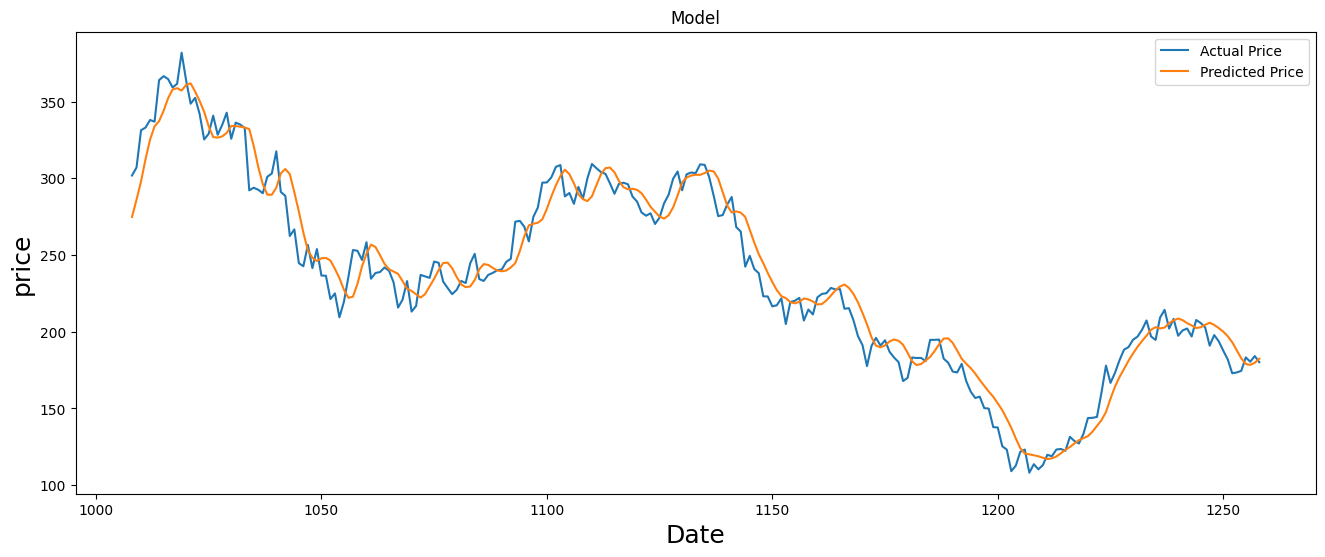

In [ ]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.plot(valid['Close'], label='Actual Price')
plt.plot(valid['Predictions'],label='Predicted Price')

plt.legend()
plt.show()


In [ ]:
 # Make predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('MAE:', mae)

# Calculate the accuracy percentage
accuracy = (1 - (mae / np.mean(y_test))) * 100
print('Accuracy:', accuracy, '%')

8/8 [==============================] - 0s 30ms/step
MAE: 10.851174150128001
Accuracy: 95.38453180711669 %
